Author: Chelsey Macaulay

Class/Section: DSCI 100-003


Summer 2025 Term 1


Due June 23rd, 2025

**Predicting Subscription Status of Game Newsletter based on Player's Characteristics**

**Introduction**

*Background*

A UBC research group within the Department of Computer Science collected data of their Minecraft server to analyse. This group, led by Frank Wood, recorded information regarding each player on the server, including age, gender, experience, first name, and total time spent playing. As this project is quite complex and time-consuming to run, this group wanted to identify if the characteristics of the player's could predict if the player would subscribe to a game-related newsletter. This would help focus recruiting and advertising efforts of the group members. 

*Question* 

In order to help this group, I identified the following question to target and analyse the data with this goal in mind: "Can a player's age and hours played be used to predict their subscription status (if they subscribe to the newsletter) in the data recorded from previous players?" 

*Data Description*

Two datasets were provided, one focused on the player data, and the other regarding each play session. I utilized the player data, which contained 7 variables in total: age, gender, experience, a hashed email, first name, hours played, and subscription status. There were a 196 observations within the data set. A detailed description of each variable is given below, grouped by variable type. 

Character-type Variables
- experience: The ranked experience of a player. Levels include Amateur, Beginner, Pro, Regular, and Veteran
- hashedEmail: A unique identifier for each player, a random sequence of numbers and letters 
- name: The first name of the player
- gender: The gender of the player. The labels included Male, Female, Non-binary, Agender, Two-Spirited, Other, and Prefer Not to Say

Numerical-type Variables
- played_hours: The amount of time each player spent on the server measured in hours
- Age: The age of the players

Logical Variables
- subscribe: The subscription status of each player. The values are either "TRUE" if subscribed, or "FALSE" if not subscribed


**Methods & Results**

*Loading the Data*

Before beginning any exploring of the data or analysis, I first loaded the necessary libraries. Then, I pulled the player data file from Github into my working directory and read in the file in an object to begin exploring the data. 

In [3]:
library(tidyverse)
library(tidymodels)
library(repr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


*Wrangling and Tidying the Data*

Now that the data is loaded in, it must be wrangled into a format that will be easiest to use in the analysis. So, I used the `select` function to keep the variables of subscription status (subscribe), age (Age), and hours played (played_hours). The other variables are not of interest and so can be eliminated from the data set 

As the subscribe variable was read as a "logical variable", I mutated this into a "factor variable" using `mutate` and `as_factor` for ease within the later analysis. 

I filtered the age variable to dismiss the options of "NA" so they would not affect any outcomes and to ensure all values in this variable are numbers using `filter`. I chose to do this as that observation does not help to answer our predictive question, as the age of these people are unknown. 

In [47]:
players_tidy <- players |>
    select(subscribe, Age, played_hours) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(!is.na(Age))
players_tidy

subscribe,Age,played_hours
<fct>,<dbl>,<dbl>
TRUE,9,30.3
TRUE,17,3.8
FALSE,17,0.0
TRUE,21,0.7
TRUE,21,0.1
TRUE,17,0.0
TRUE,19,0.0
FALSE,21,0.0
TRUE,17,0.1


*Exploring the Data with Summary Statistics* 

To explore the data, I used `group_by` and `summarize` to calculate the mean age and mean hours played within the data set. From the results below, I can see that the mean age is similar in both classes, which may hinder the accuracy of the classification model. However, the mean_hours for both groups are different, showing that players that are subscribed to the newsletter seem to play more than those who are not. This is beneficial information regarding the player characteristics that are likely to subscribe

In [56]:
players_summary <- players_tidy |>
    group_by(subscribe) |>
    summarize(mean_age = mean(Age),
              mean_hours = mean(played_hours))
players_summary

subscribe,mean_age,mean_hours
<fct>,<dbl>,<dbl>
FALSE,22.98077,0.5019231
TRUE,19.61972,7.8830986


*Exploring the Data with Visualizations* 

To explore the data through visualizations, I created two distributions to see the range of ages and hours played within the data, while seeing how subscription status compared to each class (Figure 1 and 2). From Figure 1, I have learned there is a wide range of ages that contribute to the server but a large portion of players are within the range of 20 years old. The subscription class does not seem to deter the wide range of ages. Figure 2 confirms what is shown in the summary statistics - that players that are subscribed tend to play more hours. 

I then created a visualization of age and hours played to explore the relationship between the two predictor variables, shown in Figure 3. It seems there is not much of a relationship between the two, and quite a bit of overlap along the baseline. This may cause issues with classifier accuracy and is something to be aware of. 

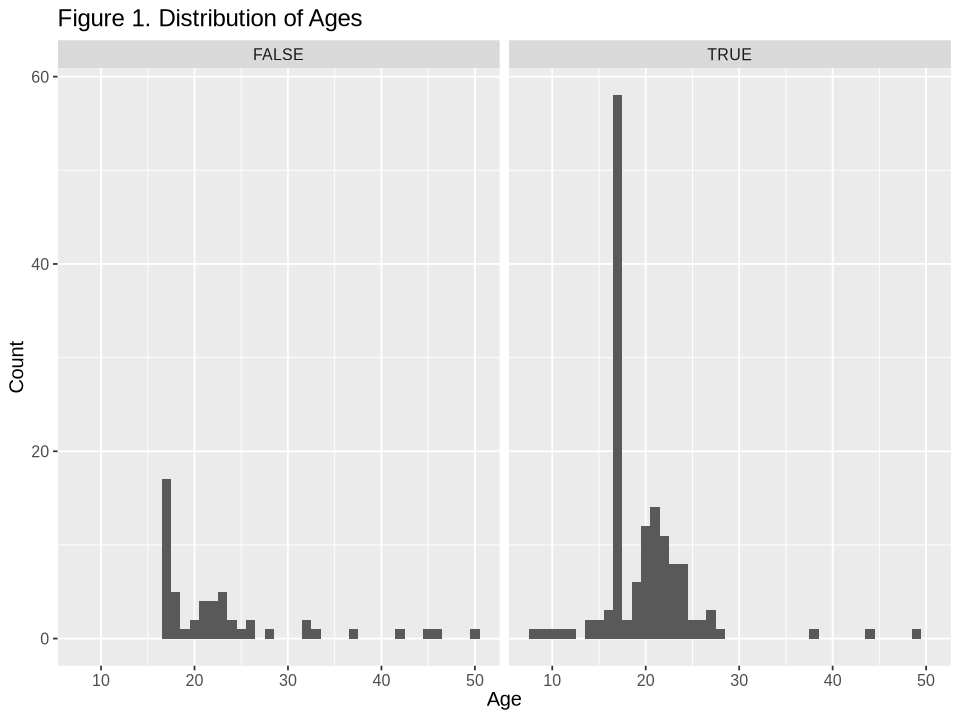

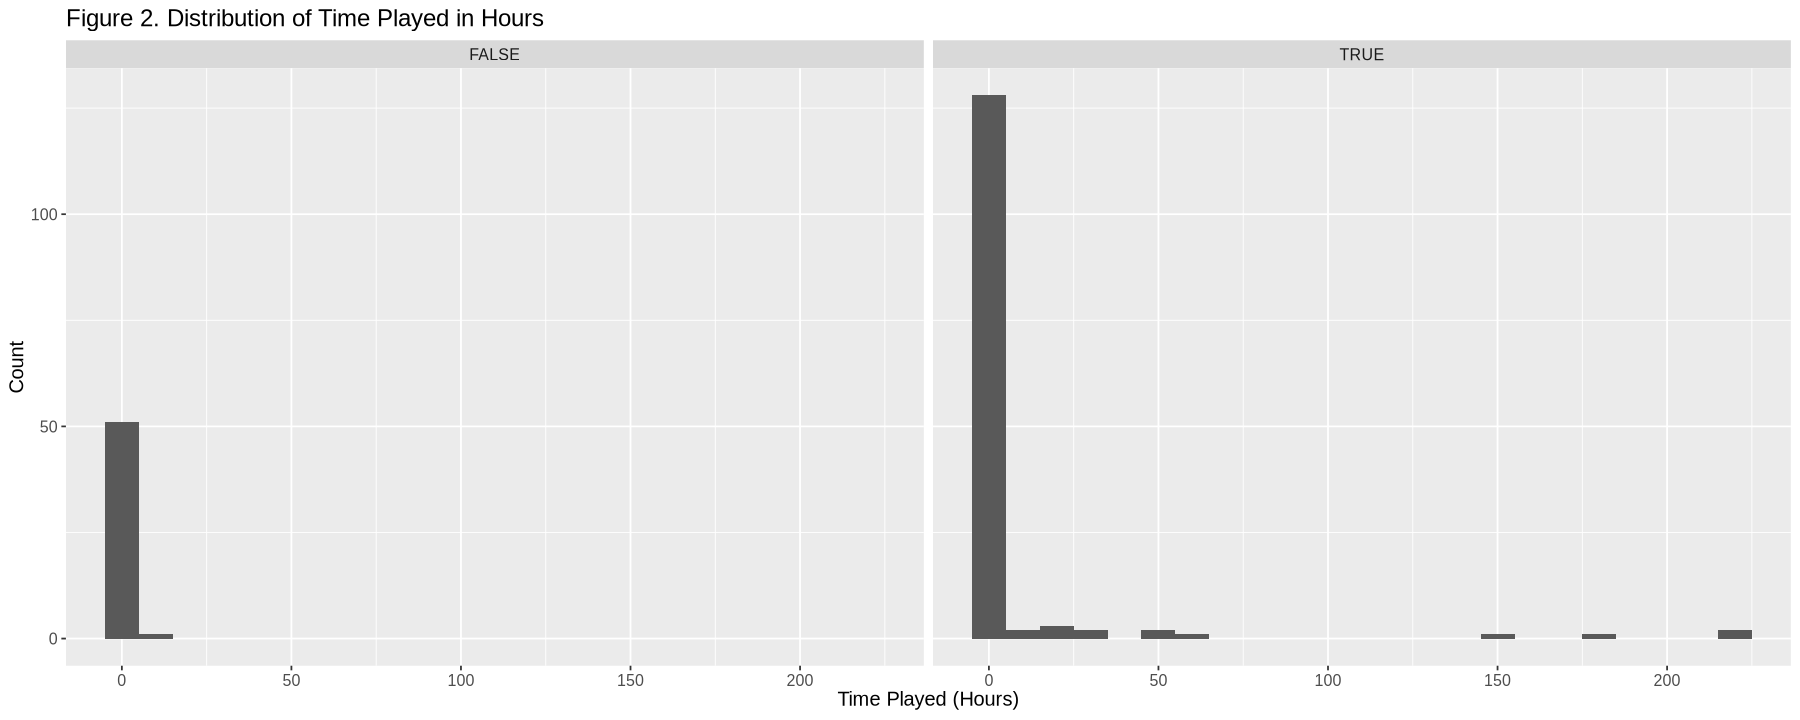

In [72]:
options(repr.plot.height = 6, repr.plot.width = 8)
age_plot <- ggplot(players_tidy, aes(x = Age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age",
         y = "Count",
         fill = "Subscription Status",
         title = "Figure 1. Distribution of Ages") +
    theme(text = element_text(size = 12)) +
    facet_wrap(vars(subscribe))
age_plot

options(repr.plot.height = 6, repr.plot.width = 15)
hours_plot <- ggplot(players_tidy, aes(x = played_hours)) +
    geom_histogram(binwidth = 10) +
    labs(x = "Time Played (Hours)",
         y = "Count",
         fill = "Subscription Status",
         title = "Figure 2. Distribution of Time Played in Hours") +
    theme(text = element_text(size = 12)) +
    facet_wrap(vars(subscribe))
hours_plot

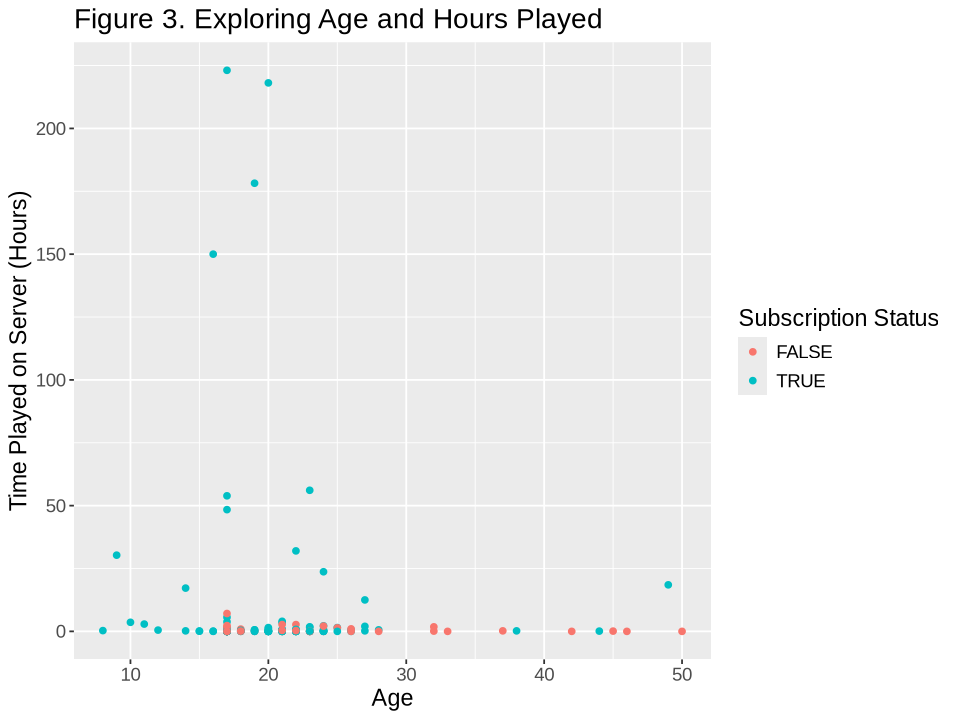

In [78]:
options(repr.plot.height = 6, repr.plot.width = 8)

players_viz <- ggplot(players_tidy, aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    labs(x = "Age",
         y = "Time Played on Server (Hours)",
         colour = "Subscription Status",
         title = "Figure 3. Exploring Age and Hours Played") +
    theme(text = element_text(size = 14))
players_viz

*Performing the Data Analysis*

- split the data into training and testing sets (a 70-30 train-test split)
- create the recipe to process all data
- 

In [68]:
set.seed(2025)

players_split <- initial_split(players_tidy, prop = 0.70, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [70]:
players_recipe <- recipe(subscribe ~ ., data = players_training) |>
    step_scale(Age) |>
    step_center(Age)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_spec) |>
    fit(data = players_training)

In [72]:
players_predictions <- predict(players_fit, players_testing) |>
    bind_cols(players_testing)
players_predictions

.pred_class,experience,subscribe,gender,Age
<fct>,<chr>,<fct>,<chr>,<dbl>
TRUE,Amateur,FALSE,Male,21
FALSE,Amateur,TRUE,Male,17
TRUE,Veteran,TRUE,Female,23
TRUE,Regular,TRUE,Female,28
TRUE,Veteran,FALSE,Male,18
TRUE,Amateur,TRUE,Male,24
TRUE,Beginner,FALSE,Male,24
TRUE,Veteran,TRUE,Male,21
FALSE,Amateur,FALSE,Male,18


In [73]:
players_metrics <- players_predictions |>
    metrics(truth = subscribe, estimate = .pred_class)
players_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7142857
kap,binary,0.1111111


In [74]:
players_matrix <- players_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)
players_matrix

          Truth
Prediction FALSE TRUE
     FALSE     3    5
     TRUE     11   37

In [76]:
players_result <- tibble(accuracy = 71.23, precision = 37/(11+37), recall = 37/(5+37))
players_result

accuracy,precision,recall
<dbl>,<dbl>,<dbl>
71.23,0.7708333,0.8809524


In [23]:
?count

count {dplyr},R Documentation
x,"A data frame, data frame extension (e.g. a tibble), or a lazy data frame (e.g. from dbplyr or dtplyr)."
...,<data-masking> Variables to group by.
wt,"<data-masking> Frequency weights. Can be NULL or a variable: If NULL (the default), counts the number of rows in each group. If a variable, computes sum(wt) for each group."
sort,"If TRUE, will show the largest groups at the top."
name,"The name of the new column in the output. If omitted, it will default to n. If there's already a column called n, it will use nn. If there's a column called n and nn, it'll use nnn, and so on, adding ns until it gets a new name."
.drop,"Handling of factor levels that don't appear in the data, passed on to group_by(). For count(): if FALSE will include counts for empty groups (i.e. for levels of factors that don't exist in the data). For add_count(): deprecated since it can't actually affect the output."
